In [90]:
from pathlib import Path
data = Path('18.txt').read_text()
data = """5,4
4,2
4,5
3,0
2,1
6,3
2,4
1,5
0,6
3,3
2,6
5,1
1,2
5,5
2,5
6,5
1,4
0,4
6,4
1,1
6,1
1,0
0,5
1,6
2,0"""
S = 6

In [81]:
data.splitlines()
coord = [tuple(int(k) for k in l.split(',')) for l in data.splitlines()]
coord, len(coord)




([(5, 4),
  (4, 2),
  (4, 5),
  (3, 0),
  (2, 1),
  (6, 3),
  (2, 4),
  (1, 5),
  (0, 6),
  (3, 3),
  (2, 6),
  (5, 1),
  (1, 2),
  (5, 5),
  (2, 5),
  (6, 5),
  (1, 4),
  (0, 4),
  (6, 4),
  (1, 1),
  (6, 1),
  (1, 0),
  (0, 5),
  (1, 6),
  (2, 0)],
 25)

In [82]:
from itertools import product

In [83]:
maze = list(product(range(0,S+1), repeat=2))
maze[-1]

(70, 70)

In [91]:
def neighbors(pos):
    x,y = pos
    yield x+1, y
    yield x-1, y
    yield x,y+1
    yield x, y-1

def inbound(pos):
    x,y = pos
    return 0<=x<=S and 0<= y <= S

In [92]:
from heapq import heappush as push, heappop as pop

In [93]:
from itertools import count

In [129]:
global visited 
def djik(maze, blocked, start):
    open = [(0,0,start)]
    global visited
    visited = dict()
    k = 0
    while True:
        k+=1
        est, score, pos = pop(open)
        if pos in visited and visited[pos] > score:
            visited[pos]=score
        elif pos not in visited:
            visited[pos]=score
        if pos == (S, S):
            print(pos, score)
            return score
        for v in [n for n in neighbors(pos) if inbound(n) and n not in blocked]:
            if v in visited.keys():
                continue
            else:
               #visited[v] = score
               #print( score+1, v)
               push(open, (70-v[0]+70-v[1], score+1, v))
            
        
        

In [130]:
djik(maze, coord[:12], (0,0)) #380 too high

(6, 6) 24


24

In [131]:
visited

{(0, 0): 0,
 (0, 1): 1,
 (0, 2): 2,
 (0, 3): 3,
 (0, 4): 4,
 (0, 5): 5,
 (1, 4): 5,
 (1, 3): 4,
 (2, 3): 5,
 (2, 2): 6,
 (3, 2): 7,
 (3, 1): 8,
 (4, 1): 9,
 (4, 0): 10,
 (5, 0): 11,
 (6, 0): 12,
 (6, 1): 13,
 (6, 2): 14,
 (5, 2): 15,
 (5, 3): 16,
 (4, 3): 17,
 (4, 4): 18,
 (3, 4): 19,
 (3, 5): 20,
 (3, 6): 21,
 (4, 6): 22,
 (5, 6): 23,
 (6, 6): 24}

In [132]:
import seaborn as sns

<Axes: >

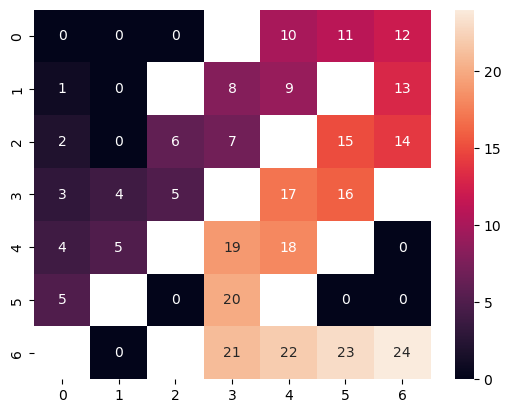

In [133]:
import numpy as np
a = np.zeros((S+1,S+1))
import  matplotlib.pyplot as plt
for x,y in coord[:12]:
    a[y,x] = None
for (x,y),val in visited.items():
    a[y,x] = val

sns.heatmap(a, annot=True)

<Axes: >

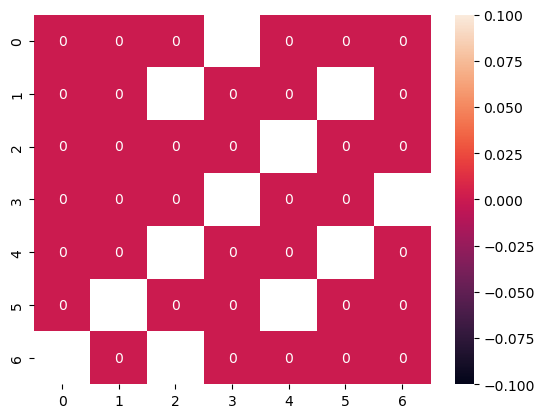